In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Final-project by Excel.csv", encoding='latin1')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Order to ship Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Order year,Order Month Name,Order Day Name,Season of order,Order Frequency,Sales Category
0,1,CA-2017-152156,11/8/2017,11/11/2017,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,Wednesday,Fall,3,High
1,2,CA-2017-152156,11/8/2017,11/11/2017,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,Wednesday,Fall,3,High
2,3,CA-2017-138688,6/12/2017,6/16/2017,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,Monday,Summer,5,Low
3,4,US-2016-108966,10/11/2016,10/18/2016,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,Tuesday,Fall,6,High
4,5,US-2016-108966,10/11/2016,10/18/2016,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,Tuesday,Fall,6,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,5/21/2017,5/28/2017,7,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,...,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,May,Sunday,Spring,12,Low
9796,9797,CA-2016-128608,1/12/2016,1/17/2016,5,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,January,Tuesday,Winter,4,Low
9797,9798,CA-2016-128608,1/12/2016,1/17/2016,5,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,Technology,Phones,GE 30524EE4,235.1880,2016,January,Tuesday,Winter,4,High
9798,9799,CA-2016-128608,1/12/2016,1/17/2016,5,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,January,Tuesday,Winter,4,Medium


C:\Users\Dell\AppData\Local\Temp\ipykernel_8248\2358939526.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator='sum', ci=None)


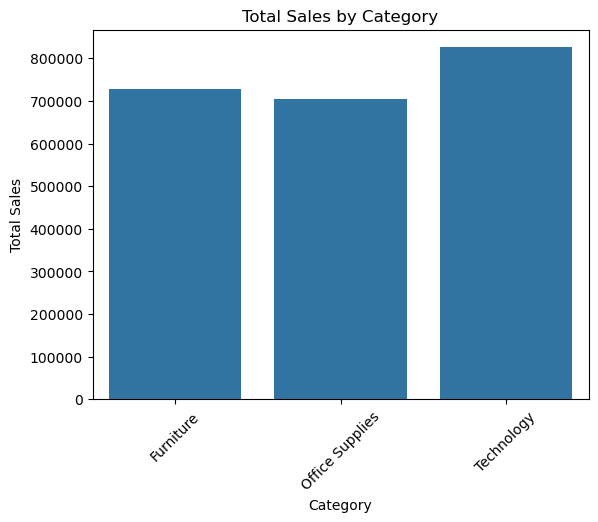

In [24]:
sns.barplot(data=df, x='Category', y='Sales', estimator='sum', ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.savefig('Total Sales by Category.png') 
plt.show()

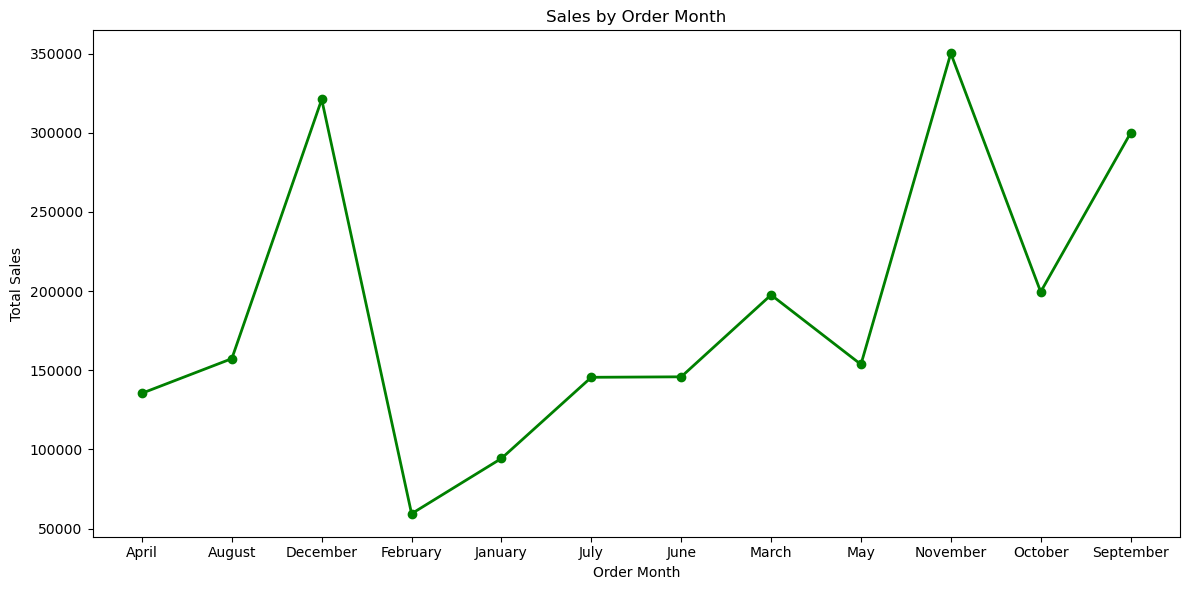

In [ ]:
sales_by_month = df.groupby('Order Month Name')['Sales'].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month, marker='o', color='g', linestyle='-', linewidth=2)
plt.title('Sales by Order Month')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.savefig('sales_by_month.png')  
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8248\1469658504.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', estimator='sum', ci=None, palette='muted')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8248\1469658504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', estimator='sum', ci=None, palette='muted')


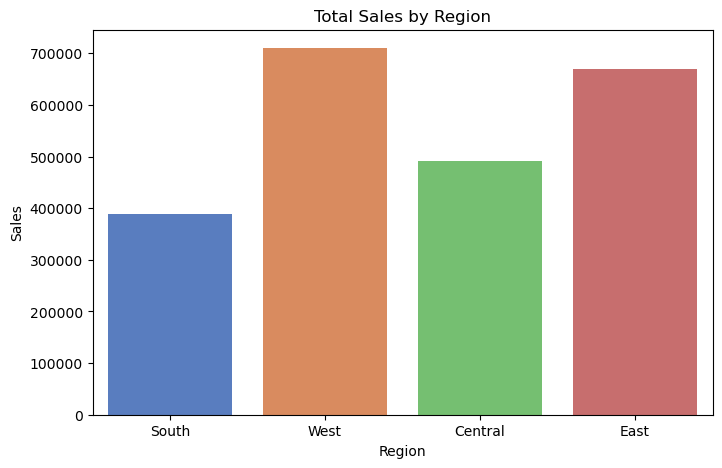

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Region', y='Sales', estimator='sum', ci=None, palette='muted')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.savefig('Total Sales by Region.png')
plt.show()


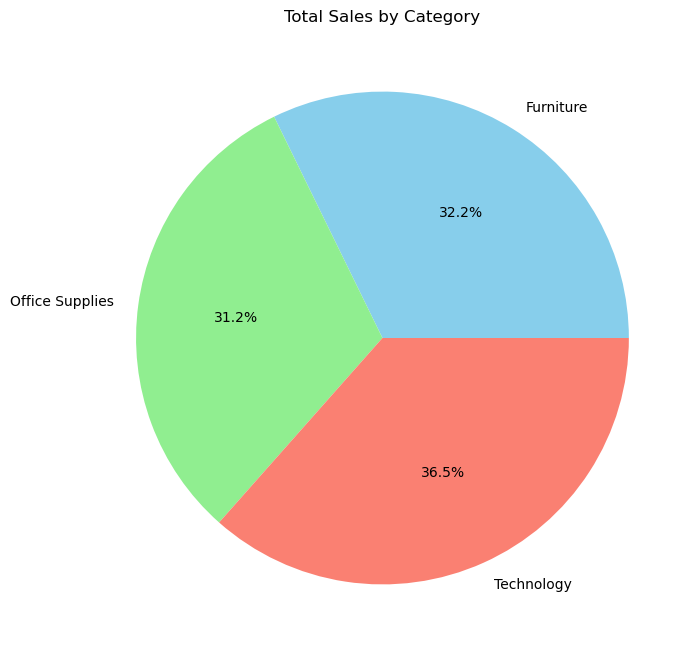

In [25]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_sales.values, labels=category_sales.index, colors=['skyblue', 'lightgreen', 'salmon'], autopct='%1.1f%%')
plt.title('Total Sales by Category')
plt.savefig('Total Sales by Category', dpi=300)
plt.show()

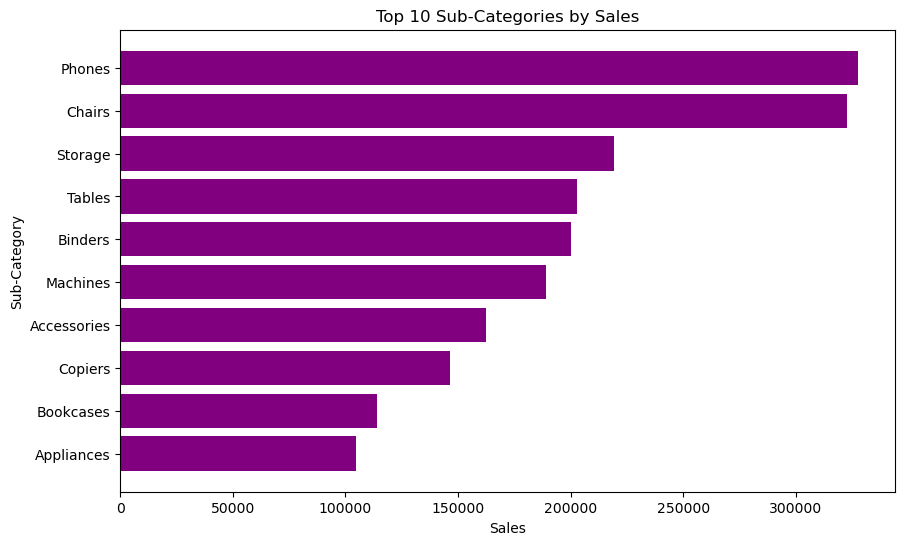

In [21]:
top_subcategories = df.groupby('Sub-Category')['Sales'].sum().nlargest(10).iloc[::-1]

plt.figure(figsize=(10, 6))
plt.barh(top_subcategories.index, top_subcategories.values, color='purple')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.savefig('Top 10 Sub-Categories by Sales')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8248\1349367746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Sales', y='City', palette='magma')


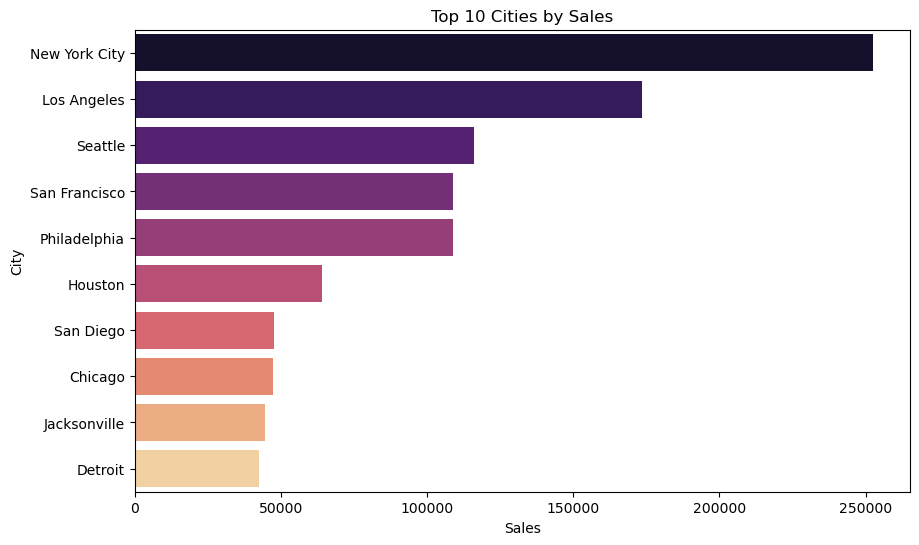

In [22]:
top_cities = df.groupby('City', as_index=False)['Sales'].sum().nlargest(10, 'Sales')

# Sort the cities by sales in descending order
top_cities = top_cities.sort_values('Sales', ascending=False)

# Plotting the bar chart with sorted cities
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='Sales', y='City', palette='magma')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.savefig('Top 10 Cities by Sales')
plt.show()
